In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete = load_umachine_sdss_with_meert15()
no_data_mask = np.isnan(full_sdss['Magr_tot_meert15'])

mask = ~no_data_mask & behroozi_complete
sdss = full_sdss[mask]
print(sdss.keys())
print("\nNumber of galaxies in complete sample = {0}".format(len(sdss)))

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'ssfr']

Number of galaxies in complete sample = 229889


In [3]:
from galsize_models.models.kravtsov13 import halo_radius_vs_stellar_mass
sdss['rvir_halo_kpc'] = halo_radius_vs_stellar_mass(10**sdss['sm'])

In [4]:
from galsize_models.models import component_size_vs_rhalo, galaxy_size_vs_rhalo
scatter = 0.2
norm_bulge, norm_disk = 0.08, 0.08
alpha_bulge, alpha_disk = 0.65, 0.65
size_model1 = galaxy_size_vs_rhalo(sdss['rvir_halo_kpc'], sdss['bulge_to_total_rband_meert15'], 
                                   norm_bulge, norm_disk, alpha_bulge, alpha_disk, 
                                   scatter=scatter)

scatter = 0.15
norm_bulge, norm_disk = 0.02, 0.1
alpha_bulge, alpha_disk = 0.7, 0.7
size_model2 = galaxy_size_vs_rhalo(sdss['rvir_halo_kpc'], sdss['bulge_to_total_rband_meert15'], 
                                   norm_bulge, norm_disk, alpha_bulge, alpha_disk, 
                                   scatter=scatter)


from galsize_models.measurements.rhalf_rvir_power_law_fit import rvir_rhalf_power_law_index_and_normalization as c1_c0_fit

alpha_true_all, norm_true_all = c1_c0_fit(sdss['r50_magr_kpc_meert15'], sdss['rvir_halo_kpc'])
alpha_model1_all, norm_model1_all = c1_c0_fit(size_model1, sdss['rvir_halo_kpc'])
alpha_model2_all, norm_model2_all = c1_c0_fit(size_model2, sdss['rvir_halo_kpc'])

from astropy.table import Table
t = Table()
t['data'] = ['SDSS', 'Model 1', 'Model 2']
t['alpha'] = [round(alpha_true_all, 2), round(alpha_model1_all, 2), round(alpha_model2_all, 2)]
t['norm'] = [round(norm_true_all, 2), round(norm_model1_all, 2), round(norm_model2_all, 2)]
print(t)

  data  alpha norm
------- ----- ----
   SDSS  0.65 0.08
Model 1  0.65 0.08
Model 2   0.5  0.2


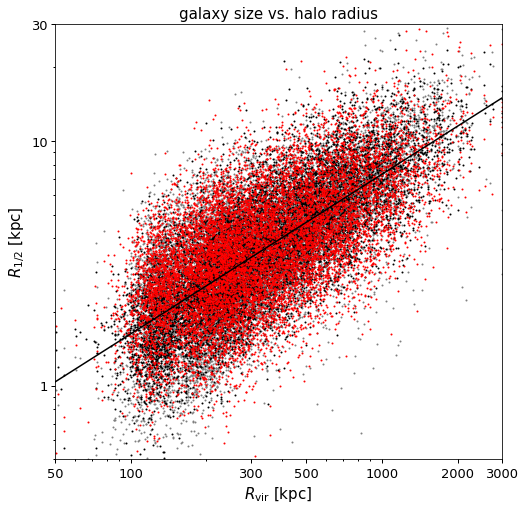

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
__=ax.loglog()

nskip = 20
__=ax.scatter(sdss['rvir_halo_kpc'][::nskip], 
              sdss['r50_magr_kpc_meert15'][::nskip], 
              color='gray', s=1, label='')

__=ax.scatter(sdss['rvir_halo_kpc'][::nskip], 
              size_model1[::nskip], 
              color='k', s=1, label='')

__=ax.scatter(sdss['rvir_halo_kpc'][::nskip], 
              size_model2[::nskip], 
              color='red', s=1, label='')

rhalo_abscissa = np.linspace(10, 25000, 200)
__=ax.plot(rhalo_abscissa, norm_true_all*rhalo_abscissa**alpha_true_all, 
          color='k', label='all galaxies')

# __=ax.plot(0.01*rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, 
#           color='blue', label='star-forming galaxies')
# __=ax.plot(0.01*rhalo_abscissa, norm_gv*rhalo_abscissa**alpha_gv, 
#           color='green', label='green valley galaxies')
# __=ax.plot(0.01*rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, 
#           color='red', label='quenched galaxies')


xlim = ax.set_xlim(50, 3000)
ylim = ax.set_ylim(0.5, 30)
__=ax.set_xticks((50, 100, 300, 500, 1000, 2000, 3000))
__=ax.set_yticks((1, 10, 30))
from matplotlib import ticker
__=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel = ax.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel = ax.set_ylabel(r'$R_{1/2}$ [kpc]')
title = ax.set_title('galaxy size vs. halo radius')
# legend = ax.legend()


In [6]:
mask_sf = sdss['ssfr'] >= -10.75
mask_gv = (sdss['ssfr'] < -10.75) & (sdss['ssfr'] >= -11.25)
mask_q = (sdss['ssfr'] < -11.25)

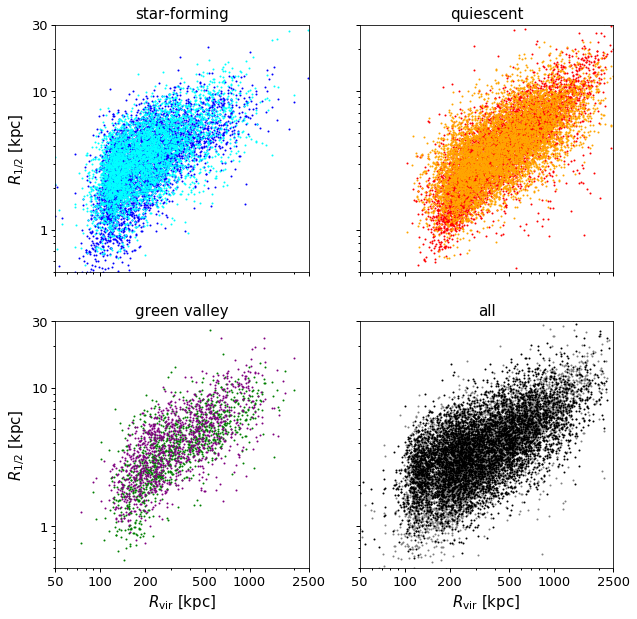

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, 
                                            figsize=(10, 10))

__=ax1.loglog(); __=ax2.loglog(); __=ax3.loglog(); __=ax4.loglog()

nskip = 20
__=ax1.scatter(sdss['rvir_halo_kpc'][mask_sf][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_sf][::nskip], 
              color='blue', s=1, label='')
__=ax1.scatter(sdss['rvir_halo_kpc'][mask_sf][::nskip], 
              size_model2[mask_sf][::nskip], 
              color='cyan', s=1, label='')

__=ax2.scatter(sdss['rvir_halo_kpc'][mask_q][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_q][::nskip], 
              color='red', s=1, label='')
__=ax2.scatter(sdss['rvir_halo_kpc'][mask_q][::nskip], 
              size_model2[mask_q][::nskip], 
              color='orange', s=1, label='')

__=ax3.scatter(sdss['rvir_halo_kpc'][mask_gv][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_gv][::nskip], 
              color='green', s=1, label='')
__=ax3.scatter(sdss['rvir_halo_kpc'][mask_gv][::nskip], 
              size_model2[mask_gv][::nskip], 
              color='purple', s=1, label='')

__=ax4.scatter(sdss['rvir_halo_kpc'][::2*nskip], 
              sdss['r50_magr_kpc_meert15'][::2*nskip], 
              color='gray', s=1, label='')
__=ax4.scatter(sdss['rvir_halo_kpc'][::2*nskip], 
              size_model2[::2*nskip], 
              color='k', s=1, label='')


# rhalo_abscissa = np.linspace(10, 50000, 200)
# __=ax1.plot(rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, color='k')
# __=ax1.plot(rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, color='red')

# __=ax2.plot(rhalo_abscissa, 0.1*rhalo_abscissa**alpha_sf, color='blue')
# __=ax2.plot(rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, color='k')

# __=ax3.plot(rhalo_abscissa, norm_gv*rhalo_abscissa**alpha_gv, color='k')

# __=ax4.plot(rhalo_abscissa, norm_sf*rhalo_abscissa**alpha_sf, color='blue')
# __=ax4.plot(rhalo_abscissa, norm_q*rhalo_abscissa**alpha_q, color='red')
# __=ax4.plot(rhalo_abscissa, norm_gv*rhalo_abscissa**alpha_gv, color='green')


xlim1 = ax1.set_xlim(50, 2500)
xlim2 = ax2.set_xlim(50, 2500)
xlim3 = ax3.set_xlim(50, 2500)
xlim4 = ax4.set_xlim(50, 2500)
ylim1 = ax1.set_ylim(.5, 30)
ylim2 = ax2.set_ylim(.5, 30)
ylim3 = ax3.set_ylim(.5, 30)
ylim4 = ax4.set_ylim(.5, 30)

__=ax1.set_xticks((50, 100, 200, 500, 1000, 2500))
__=ax1.set_yticks((1, 10, 30))
from matplotlib import ticker
__=ax1.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax1.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax1.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax3.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax3.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax3.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax3.get_yaxis().set_minor_formatter(ticker.NullFormatter())
__=ax4.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax4.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax4.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax4.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel3 = ax3.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel1 = ax1.set_ylabel(r'$R_{1/2}$ [kpc]')
xlabel4 = ax4.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel3 = ax3.set_ylabel(r'$R_{1/2}$ [kpc]')
title1 = ax1.set_title('star-forming')
title2 = ax2.set_title('quiescent')
title3 = ax3.set_title('green valley')
title4 = ax4.set_title('all')

fig.savefig('galsize_vs_rhalo_double_power_law_fits.pdf', 
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')


In [11]:
import os 
dirname = os.path.realpath('.')

from galsize_models.measurements.measure_sdss_clustering import measure_wp

In [14]:
sm_low, sm_high = 10.75, 11.25
rp, wp, wperr = measure_wp(sdss, mask_gv, sm_low, sm_high, dirname)

# fig, ax = plt.subplots(1, 1)

# __=ax.loglog()
# __=ax.plot(rp, wp)

auto_regions.txt
